In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [2]:
df=pd.read_csv('quikr_car - quikr_car.csv')

In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df.shape

(892, 6)

In [5]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
df=df.drop_duplicates()

In [8]:
df.name=df.name.str.split(' ').str.slice(0,3).str.join(' ')

In [9]:
df.name

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
2          Maruti Suzuki Alto
3           Hyundai Grand i10
4      Ford EcoSport Titanium
                ...          
887                        Ta
888              Tata Zest XM
889        Mahindra Quanto C8
890           Honda Amaze 1.2
891        Chevrolet Sail 1.2
Name: name, Length: 798, dtype: object

In [10]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [11]:
df=df[df['year'].str.isnumeric()]
df.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [12]:
df['year']=df['year'].astype(int)

In [13]:
df['year']=2022-df['year']

In [14]:
df[df['year']<0]

,name,company,year,Price,kms_driven,fuel_type


In [15]:
import re
d=[]
for i in df.Price:
    if re.findall("[a-zA-Z.]",i):
        d.append(i)
print(d)
df.shape

['Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price', 'Ask For Price']


(749, 6)

In [16]:
df= df.drop(df[df.Price=='Ask For Price'].index)

In [17]:
df.Price = df.Price[df.Price.notnull()].apply(lambda x: x.replace(',', '')).astype('int')
df.Price

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 727, dtype: int32

In [18]:
df.shape

(727, 6)

In [19]:
df.kms_driven=df.kms_driven.replace(' km', '')

In [20]:
df.kms_driven.info()

<class 'pandas.core.series.Series'>
Int64Index: 727 entries, 0 to 891
Series name: kms_driven
Non-Null Count  Dtype 
--------------  ----- 
727 non-null    object
dtypes: object(1)
memory usage: 11.4+ KB


In [21]:
df.kms_driven.unique()


array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [22]:
import re
d=[]
for i in df.kms_driven:
    if re.findall("[a-zA-Z.]",i):
        d.append(i)
print(d)
df.shape

['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms', '25,000 kms', '24,530 kms', '60,000 kms', '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms', '39,000 kms', '39,000 kms', '82,000 kms', '20,000 kms', '68,000 kms', '32,000 kms', '38,000 kms', '27,000 kms', '33,000 kms', '46,000 kms', '46,000 kms', '36,000 kms', '55,000 kms', '16,000 kms', '36,000 kms', '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms', '19,000 kms', '60,000 kms', '41,000 kms', '35,000 kms', '54,000 kms', '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms', '13,500 kms', '30,000 kms', '50,000 kms', '20,000 kms', '39,000 kms', '30,000 kms', '3,600 kms', '32,000 kms', '38,000 kms', '45,000 kms', '35,000 kms', '50,000 kms', '45,863 kms', '60,500 kms', '12,500 kms', '60,000 k

(727, 6)

In [23]:
df=df.drop(df[df.kms_driven=='Petrol'].index)
df.kms_driven=df.kms_driven.str.split().str.slice(0,1).str.join(' ').str.replace(',', '').astype(int)

In [24]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     1
dtype: int64

In [25]:
df.dropna(subset = ['fuel_type'])

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,15,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,16,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,8,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,8,575000,36000,Diesel
6,Ford Figo,Ford,10,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,11,270000,50000,Petrol
885,Tata Indica V2,Tata,13,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,13,300000,132000,Petrol
888,Tata Zest XM,Tata,4,260000,27000,Diesel


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        725 non-null    object
 1   company     725 non-null    object
 2   year        725 non-null    int32 
 3   Price       725 non-null    int32 
 4   kms_driven  725 non-null    int32 
 5   fuel_type   724 non-null    object
dtypes: int32(3), object(3)
memory usage: 31.2+ KB


In [27]:
df = df.reset_index(drop=True)
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,15,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,16,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,8,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,8,575000,36000,Diesel
4,Ford Figo,Ford,10,175000,41000,Diesel
...,...,...,...,...,...,...
720,Maruti Suzuki Ritz,Maruti,11,270000,50000,Petrol
721,Tata Indica V2,Tata,13,110000,30000,Diesel
722,Toyota Corolla Altis,Toyota,13,300000,132000,Petrol
723,Tata Zest XM,Tata,4,260000,27000,Diesel


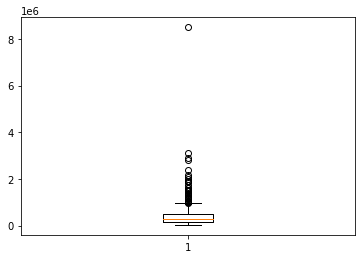

In [28]:
bp =plt.boxplot(df.Price)
plt.show()

In [29]:
lower_limit = df.Price.mean() - 3*df.Price.std()
upper_limit = df.Price.mean() + 3*df.Price.std()
print(lower_limit)
print(upper_limit)
df.shape

-1036888.0581406293
1843024.405726836


(725, 6)

In [30]:
df=df[(df['Price']>lower_limit)&(df['Price']<upper_limit)]
df.shape

(712, 6)

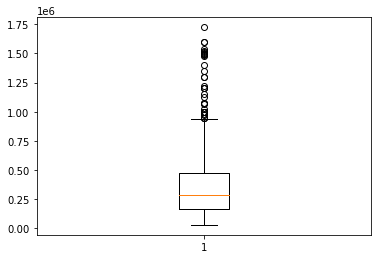

In [31]:
bp =plt.boxplot(df.Price)
plt.show()

In [32]:
df.company.unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Jeep'], dtype=object)

In [33]:
x = df.drop(['Price'], axis=1)
y= df.Price

In [34]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,15,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,16,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,8,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,8,575000,36000,Diesel
4,Ford Figo,Ford,10,175000,41000,Diesel
...,...,...,...,...,...,...
720,Maruti Suzuki Ritz,Maruti,11,270000,50000,Petrol
721,Tata Indica V2,Tata,13,110000,30000,Diesel
722,Toyota Corolla Altis,Toyota,13,300000,132000,Petrol
723,Tata Zest XM,Tata,4,260000,27000,Diesel


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

In [36]:

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# LinearRegression

In [37]:
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

ohe.categories_

In [38]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                     remainder='passthrough')

In [39]:
lr=LinearRegression()

In [40]:
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0', 'Audi A8',
       'Audi Q3 2.0', 'Audi Q7', 'BMW 3 Series', 'BMW 5 Series',
       'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d', 'BMW X1 xDrive20d',
       'Chevrolet Beat', 'Chevrolet Beat Diesel', 'Chevrolet Beat LS',
       'Che...
       'Volkswagen Vento Konekt'], dtype=object),
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jeep', 'Mahindra', 'Maruti',
       'Mercedes', 'Mitsubishi', 'Nissan', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen'], dtype=object),
                                                                            array(['Dies

In [41]:
y_pred=pipe.predict(x_test)


In [42]:
r2_score(y_test,y_pred)

0.8268175271097886

In [43]:
x_test.shape

(143, 5)

In [44]:
1 - ((1-0.5779519195031803)*(143-1)/(143-1-5))  #adjusted r2 score

0.562548704886508

# changing random state to obtain best accuracy

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

In [46]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [47]:
np.argmax(scores)

600

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=600)
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.8354338008528072

In [49]:
x_test.shape

(143, 5)

In [50]:
adjusted_r2=1 - ((1-0.7979163098150597)*(143-1)/(143-1-5))
adjusted_r2

0.7905409926550253

# Random Forest 

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

In [52]:
numeric_processor=Pipeline(
    steps=[
          ("scaler",StandardScaler())]

)

In [53]:
categorical_processor=Pipeline(
    steps=[
          ("onehot",OneHotEncoder(handle_unknown="ignore"))]

)

In [54]:

preprocessor=ColumnTransformer(
    [("categorical",categorical_processor,["name","company","fuel_type"]),
    ("numerical",numeric_processor,["year","kms_driven"])]
)


In [55]:
from sklearn.ensemble import RandomForestClassifier
pipe=make_pipeline(preprocessor,RandomForestClassifier())

In [56]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'company',
                                                   'fuel_type']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'kms_driven'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [57]:
y_pred = pipe.predict(x_test)

In [58]:
r2_score(y_test,y_pred)

0.9990685270491543

In [59]:
adjusted_r2=1 - ((1-0.9985896601974361)*(143-1)/(143-1-5)) 
adjusted_r2

0.9985381879418681